# Basic Image Processing

This Jupyter Notebook can be used to do test some basic image processing like cropping an image, changing the colorspace and slecting certain color ranges.

First, you need the opencv library, numpy and matplotlib to plot the images.

In [1]:
%pip install opencv-python matplotlib numpy

ERROR: Could not find a version that satisfies the requirement opencv-python (from versions: none)
ERROR: No matching distribution found for opencv-python

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Import the libraries and read the image file. Note, that OpenCV uses the BGR (blue-green-red) colorspace. Plt instead uses the RGB colorspace. For that reason, we need to convert it back to show the image in this notebook.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('robo/camera/zimage-0c503359-5464-44db-bec0-763150d5be38.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

ModuleNotFoundError: No module named 'cv2'

The `image` is a numpy array. Each pixel has three values for the blue (B), green (G) and red (R) channel with values between 0-255.

In [4]:
print("type of image: " + str(type(image)))
print("shape of image: " + str(image.shape))

type of image: <class 'numpy.ndarray'>
shape of image: (735, 960, 3)


To get the intensity of the blue channel of the pixel at location x = 50, y = 400:

In [5]:
print("blue channel value of pixel at x=50, y=400 is " + str(image[400][50][0]))

blue channel value of pixel at x=50, y=400 is 120


To filter a certain color range, it is more practical to use the HSV color space instead of the BGR or RGB space. Have a look at the Wikipedia article [HSV-Farbraum]([https://de.wikipedia.org/wiki/HSV-Farbraum) .

We convert the image, chose a certain range of values and create a mask. Modify the values for the range to select the color of choice.


The mask that is created is either 0 for pixel that are outside the range, or 255 for pixels that are within the range.

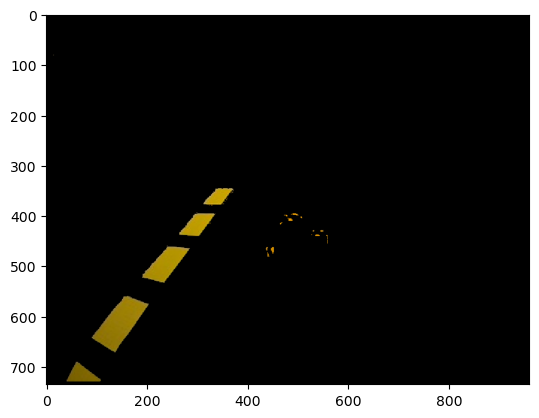

In [6]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


yellow_lower_hsv = np.array([20, 100, 100])
yellow_upper_hsv = np.array([30, 255, 255])  
mask = cv2.inRange(image_hsv, yellow_lower_hsv, yellow_upper_hsv)

# show the part of the image that is within the color range
masked = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))


For the Breitenberg vehicle, define which regions of the image correspond to the left and right sensory input. How can you translate the information of that regions into a value that can be used to send motor commands to the wheels?

In [18]:
# devide the image into a left and a right half
height, width, channels = image.shape

half = width // 2

right = image[:, half:]
left = image[:, :half]


# calculate a value for the left and the right sensory input



In [19]:
cv2.imwrite('image-right.jpeg', right)
cv2.imwrite('image-left.jpeg', left)


True

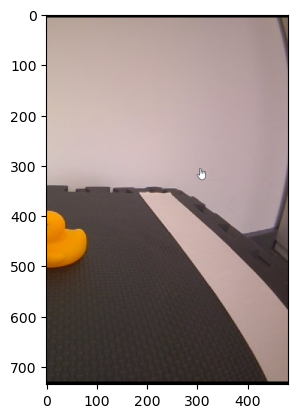

In [22]:
plt.imshow(cv2.cvtColor(right, cv2.COLOR_BGR2RGB))


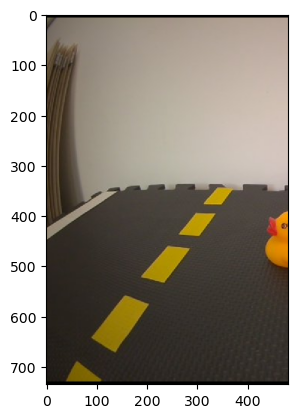

In [23]:
plt.imshow(cv2.cvtColor(left, cv2.COLOR_BGR2RGB))